In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd 
import numpy as np
import sklearn
from sklearn import metrics
import math
import seaborn as sns
import statistics
import matplotlib.pyplot as plt

'''
PN = Patient Number
SN = Slice Number
PL = Percent of points on the bot-left of Emcon Line
PR = Percent of points on the top-right of the Emcon Line

'''
df = pd.read_csv("TMJ_Updated_Calc.csv")
df = df.drop(df[np.isnan(df['Dislocated'])].index)

df.count()

Patient_Number    2077
Slice_Number      2077
PL                2077
PR                2077
Distance          2077
Dislocated        2077
dtype: int64

[Text(0.5, 0, 'Percentage Left'),
 Text(0, 0.5, 'Dislocated'),
 Text(0.5, 1.0, 'Percentage Left vs. Dislocated')]

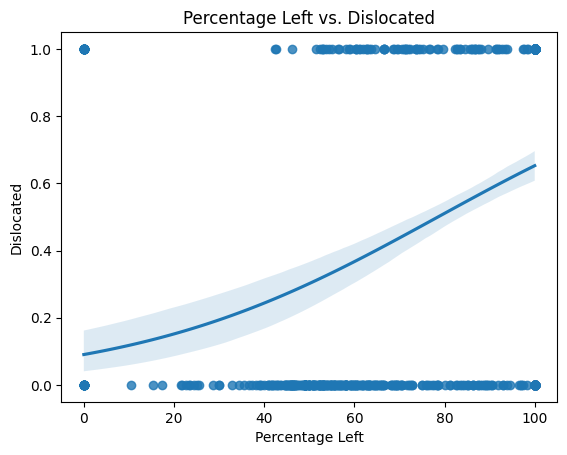

In [5]:
'''
Percentage Left Plot
'''

zero_df = df[df['Dislocated'] == 0]
one_df = df[df['Dislocated'] == 1]

zero_df_sample = zero_df.sample(n = 424)
one_df_sample = one_df.sample(n = 424)

cs = pd.concat([zero_df_sample,one_df_sample])

x = cs["PL"]
y = cs["Dislocated"]

plot = sns.regplot(x= x, y = y, data = cs, logistic=True)
plot.set(xlabel ="Percentage Left", ylabel = "Dislocated", title ='Percentage Left vs. Dislocated')


[Text(0.5, 0, 'Percentage Right'),
 Text(0, 0.5, 'Dislocated'),
 Text(0.5, 1.0, 'Percentage Right vs. Dislocated')]

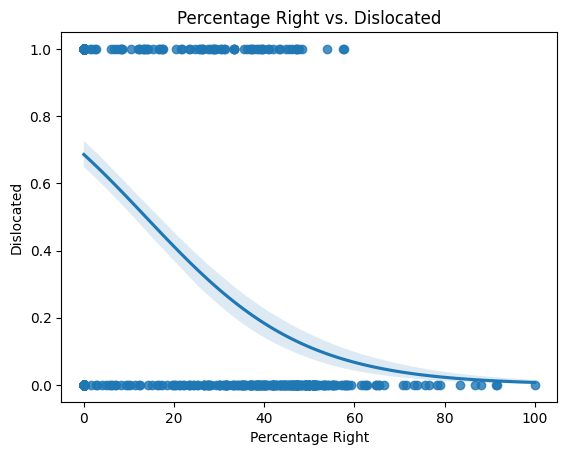

In [7]:
'''
Percentage Right Plot
'''

zero_df = df[df['Dislocated'] == 0]
one_df = df[df['Dislocated'] == 1]

zero_df_sample = zero_df.sample(n = 424)
one_df_sample = one_df.sample(n = 424)

cs = pd.concat([zero_df_sample,one_df_sample])

x = cs["PR"]
y = cs["Dislocated"]

plot = sns.regplot(x= x, y = y, data = cs, logistic=True)
plot.set(xlabel ="Percentage Right", ylabel = "Dislocated", title ='Percentage Right vs. Dislocated')

[Text(0.5, 0, 'Distance'),
 Text(0, 0.5, 'Dislocated'),
 Text(0.5, 1.0, 'Distance vs. Dislocated')]

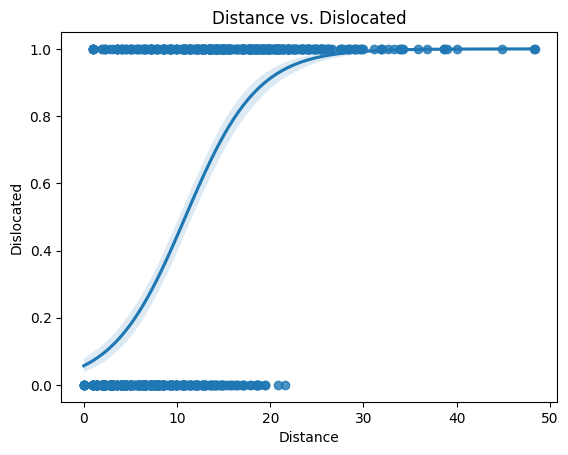

In [9]:
'''
Distance Plot
'''

zero_df = df[df['Dislocated'] == 0]
one_df = df[df['Dislocated'] == 1]

zero_df_sample = zero_df.sample(n = 424)
one_df_sample = one_df.sample(n = 424)

cs = pd.concat([zero_df_sample,one_df_sample])

x = cs["Distance"]
y = cs["Dislocated"]

plot = sns.regplot(x= x, y = y, data = cs, logistic=True)
plot.set(xlabel ="Distance", ylabel = "Dislocated", title ='Distance vs. Dislocated')

In [98]:
'''
PL Average
'''

for i in range(10):
    zero_df = df[df['Dislocated'] == 0]
    one_df = df[df['Dislocated'] == 1]
    
    zero_df_sample = zero_df.sample(n = 424)
    one_df_sample = one_df.sample(n = 424)
    
    d_avg = one_df_sample["PL"].mean()
    nd_avg = zero_df_sample["PL"].mean()
    
    print('-'* 45)
    print("Percentage Left Sample:", i + 1)
    print("Dislocated Average:", d_avg)
    print("Non-Dislocated Average:", nd_avg)


---------------------------------------------
Percentage Left Sample: 1
Dislocated Average: 87.68263973509434
Non-Dislocated Average: 68.07348067443633
---------------------------------------------
Percentage Left Sample: 2
Dislocated Average: 87.68263973509434
Non-Dislocated Average: 68.6207487817217
---------------------------------------------
Percentage Left Sample: 3
Dislocated Average: 87.68263973509434
Non-Dislocated Average: 67.75886208906368
---------------------------------------------
Percentage Left Sample: 4
Dislocated Average: 87.68263973509434
Non-Dislocated Average: 66.57708999761086
---------------------------------------------
Percentage Left Sample: 5
Dislocated Average: 87.68263973509434
Non-Dislocated Average: 64.53462941509433
---------------------------------------------
Percentage Left Sample: 6
Dislocated Average: 87.68263973509434
Non-Dislocated Average: 67.03045140140802
---------------------------------------------
Percentage Left Sample: 7
Dislocated Averag

In [101]:
'''
PR Average
'''

for i in range(10):
    zero_df = df[df['Dislocated'] == 0]
    one_df = df[df['Dislocated'] == 1]
    
    zero_df_sample = zero_df.sample(n = 424)
    one_df_sample = one_df.sample(n = 424)
    
    d_avg = one_df_sample["PR"].mean()
    nd_avg = zero_df_sample["PR"].mean()
    
    print('-'* 45)
    print("Percentage Right Sample:", i + 1)
    print("Dislocated Average:", d_avg)
    print("Non-Dislocated Average:", nd_avg)

---------------------------------------------
Percentage Right Sample: 1
Dislocated Average: 5.241888566806603
Non-Dislocated Average: 27.23913545346934
---------------------------------------------
Percentage Right Sample: 2
Dislocated Average: 5.241888566806604
Non-Dislocated Average: 27.54564766203302
---------------------------------------------
Percentage Right Sample: 3
Dislocated Average: 5.241888566806604
Non-Dislocated Average: 27.665037589759432
---------------------------------------------
Percentage Right Sample: 4
Dislocated Average: 5.241888566806604
Non-Dislocated Average: 27.54580826087028
---------------------------------------------
Percentage Right Sample: 5
Dislocated Average: 5.241888566806604
Non-Dislocated Average: 28.063697754865565
---------------------------------------------
Percentage Right Sample: 6
Dislocated Average: 5.241888566806604
Non-Dislocated Average: 29.69270916006368
---------------------------------------------
Percentage Right Sample: 7
Disloca

In [102]:
'''
Distance Average
'''

for i in range(10):
    zero_df = df[df['Dislocated'] == 0]
    one_df = df[df['Dislocated'] == 1]
    
    zero_df_sample = zero_df.sample(n = 424)
    one_df_sample = one_df.sample(n = 424)
    
    d_avg = one_df_sample["Distance"].mean()
    nd_avg = zero_df_sample["Distance"].mean()
    
    print('-'* 45)
    print("Distance Sample:", i + 1)
    print("Dislocated Average:", d_avg)
    print("Non-Dislocated Average:", nd_avg)

---------------------------------------------
Distance Sample: 1
Dislocated Average: 16.810108793978774
Non-Dislocated Average: 6.163215540832548
---------------------------------------------
Distance Sample: 2
Dislocated Average: 16.810108793978774
Non-Dislocated Average: 6.520131395896227
---------------------------------------------
Distance Sample: 3
Dislocated Average: 16.810108793978774
Non-Dislocated Average: 6.881733861617924
---------------------------------------------
Distance Sample: 4
Dislocated Average: 16.810108793978774
Non-Dislocated Average: 6.889286187382076
---------------------------------------------
Distance Sample: 5
Dislocated Average: 16.810108793978774
Non-Dislocated Average: 6.50046650978066
---------------------------------------------
Distance Sample: 6
Dislocated Average: 16.810108793978774
Non-Dislocated Average: 6.634259871823113
---------------------------------------------
Distance Sample: 7
Dislocated Average: 16.810108793978774
Non-Dislocated Averag

In [87]:
'''
Percentage Left AUC Score
'''
auc_list = []
for epoch in range(10):
    zero_df = df[df['Dislocated'] == 0]
    one_df = df[df['Dislocated'] == 1]
    
    zero_df_sample = zero_df.sample(n = 424)
    one_df_sample = one_df.sample(n = 424)
    
    cs = pd.concat([zero_df_sample,one_df_sample])
    
    x = cs["PL"]
    y = cs["Dislocated"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    clf = LogisticRegression(solver="liblinear", random_state=0).fit(x_train.values.reshape(-1,1), y_train)
    auc_score = roc_auc_score(y_test, clf.predict_proba(x_test.values.reshape(-1,1))[:, 1])
    
    print('-'*40)
    print("PL Sample:", epoch + 1)
    print(auc_score)


----------------------------------------
PL Sample: 1
0.80119301994302
----------------------------------------
PL Sample: 2
0.7779905584751046
----------------------------------------
PL Sample: 3
0.7507793711588134
----------------------------------------
PL Sample: 4
0.7009437321937322
----------------------------------------
PL Sample: 5
0.8000801282051282
----------------------------------------
PL Sample: 6
0.7151808091657715
----------------------------------------
PL Sample: 7
0.7673648406731114
----------------------------------------
PL Sample: 8
0.7310606060606061
----------------------------------------
PL Sample: 9
0.7397064088793412
----------------------------------------
PL Sample: 10
0.7141640519946213


In [12]:
'''
Percentage Right AUC Score
'''
auc_list = []
for epoch in range(10):
    zero_df = df[df['Dislocated'] == 0]
    one_df = df[df['Dislocated'] == 1]
    
    zero_df_sample = zero_df.sample(n = 424)
    one_df_sample = one_df.sample(n = 424)
    
    cs = pd.concat([zero_df_sample,one_df_sample])
    
    x = cs["PR"]
    y = cs["Dislocated"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    clf = LogisticRegression(solver="liblinear", random_state=0).fit(x_train.values.reshape(-1,1), y_train)
    auc_score = roc_auc_score(y_test, clf.predict_proba(x_test.values.reshape(-1,1))[:, 1])
    print('-'*40)
    print("PR Sample:", epoch + 1)
    print(auc_score)

----------------------------------------
PR Sample: 1
0.7873871457942254
----------------------------------------
PR Sample: 2
0.7599910992434357
----------------------------------------
PR Sample: 3
0.7679255366527122
----------------------------------------
PR Sample: 4
0.7748726200053634
----------------------------------------
PR Sample: 5
0.7909058360186179
----------------------------------------
PR Sample: 6
0.7603276353276354
----------------------------------------
PR Sample: 7
0.7758912655971479
----------------------------------------
PR Sample: 8
0.7324999999999999
----------------------------------------
PR Sample: 9
0.7874499332443259
----------------------------------------
PR Sample: 10
0.7416495947269973


In [11]:
'''
Distance AUC Score
'''
auc_list = []
for epoch in range(10):
    zero_df = df[df['Dislocated'] == 0]
    one_df = df[df['Dislocated'] == 1]
    
    zero_df_sample = zero_df.sample(n = 424)
    one_df_sample = one_df.sample(n = 424)
    
    cs = pd.concat([zero_df_sample,one_df_sample])
    
    x = cs["Distance"]
    y = cs["Dislocated"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    clf = LogisticRegression(solver="liblinear", random_state=0).fit(x_train.values.reshape(-1,1), y_train)
    auc_score = roc_auc_score(y_test, clf.predict_proba(x_test.values.reshape(-1,1))[:, 1])
    print('-'*40)
    print("Distance Sample:", epoch + 1)
    print(auc_score)

----------------------------------------
Distance Sample: 1
0.9065865598575878
----------------------------------------
Distance Sample: 2
0.871517857142857
----------------------------------------
Distance Sample: 3
0.8546563390313391
----------------------------------------
Distance Sample: 4
0.8656364122205399
----------------------------------------
Distance Sample: 5
0.8378305692514567
----------------------------------------
Distance Sample: 6
0.8585552685490336
----------------------------------------
Distance Sample: 7
0.8552760681473554
----------------------------------------
Distance Sample: 8
0.8562170376329666
----------------------------------------
Distance Sample: 9
0.847860962566845
----------------------------------------
Distance Sample: 10
0.8833333333333333
